1. Goal
2. The History of the Data
    - Introduction
    - Distributions
        - Numeric Variables
        - Categorical Variables
    - Statistics
    - What's the data telling us
3. Outliers Detection
    - Distributions and Statistics after Outlier Detection
4. Clustering
5. Remove redundant variables
6. Variable selection

# Goal

# The History of the Data

## Introduction

Target: `price`

Feature == Important == In-between == Not-important == Reason

1. **daft_id**:
    - Verdict:
    - Reason:
2. **url**:
    - Verdict:
    - Reason:
3. **name**:
    - Verdict:
    - Reason:
4. **price**:
    - Verdict:
    - Reason:
5. **sale_type**:
    - Verdict:
    - Reason:
6. **floor_area**:
    - Verdict:
    - Reason:
7. **entered_renewed**:
    - Verdict:
    - Reason:
8. **views**:
    - Verdict:
    - Reason:
9. **type**:
    - Verdict:
    - Reason:
10. **scraping_date**:
    - Verdict:
    - Reason:
11. **latitude**:
    - Verdict:
    - Reason:
12. **longitude**:
    - Verdict:
    - Reason:
13. **bedroom**:
    - Verdict:
    - Reason:
14. **bathroom**:
    - Verdict:
    - Reason:
15. ****:
    - Verdict:
    - Reason:
16. ****:
    - Verdict:
    - Reason:



## Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [3]:
sale_data = pd.read_csv('data_available/sale_data_post_C&W.csv', sep=',', parse_dates=['entered_renewed', 'scraping_date'])
sale_data.shape

(7695, 15)

In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   daft_id          7695 non-null   int64         
 1   url              7695 non-null   object        
 2   name             7695 non-null   object        
 3   price            7695 non-null   float64       
 4   sale_type        7695 non-null   object        
 5   floor_area       7695 non-null   int64         
 6   entered_renewed  7695 non-null   datetime64[ns]
 7   views            7695 non-null   float64       
 8   type_house       7695 non-null   object        
 9   type             7695 non-null   object        
 10  scraping_date    7695 non-null   datetime64[ns]
 11  latitude         7695 non-null   float64       
 12  longitude        7695 non-null   float64       
 13  bedroom          7695 non-null   int64         
 14  bathroom         7695 non-null   int64  

### Numeric Variables

In [5]:
sale_data.drop(columns=['daft_id']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,7695.0,441123.840026,559497.409220,25000.000000,220000.000000,315000.000000,475000.000000,1.000000e+07
floor_area,7695.0,149.191813,187.894773,1.000000,83.000000,112.000000,170.000000,1.027900e+04
views,7695.0,6813.656660,7594.513251,0.000000,2526.500000,4567.000000,8257.000000,1.364560e+05
latitude,7695.0,53.073054,0.718554,51.460139,52.607087,53.283705,53.395819,5.536339e+01
longitude,7695.0,-7.432629,1.191594,-10.459878,-8.493948,-7.109124,-6.277835,-6.027847e+00
bedroom,7695.0,3.419753,1.510908,1.000000,3.000000,3.000000,4.000000,4.300000e+01
bathroom,7695.0,2.350227,1.476052,1.000000,1.000000,2.000000,3.000000,4.700000e+01


--------------

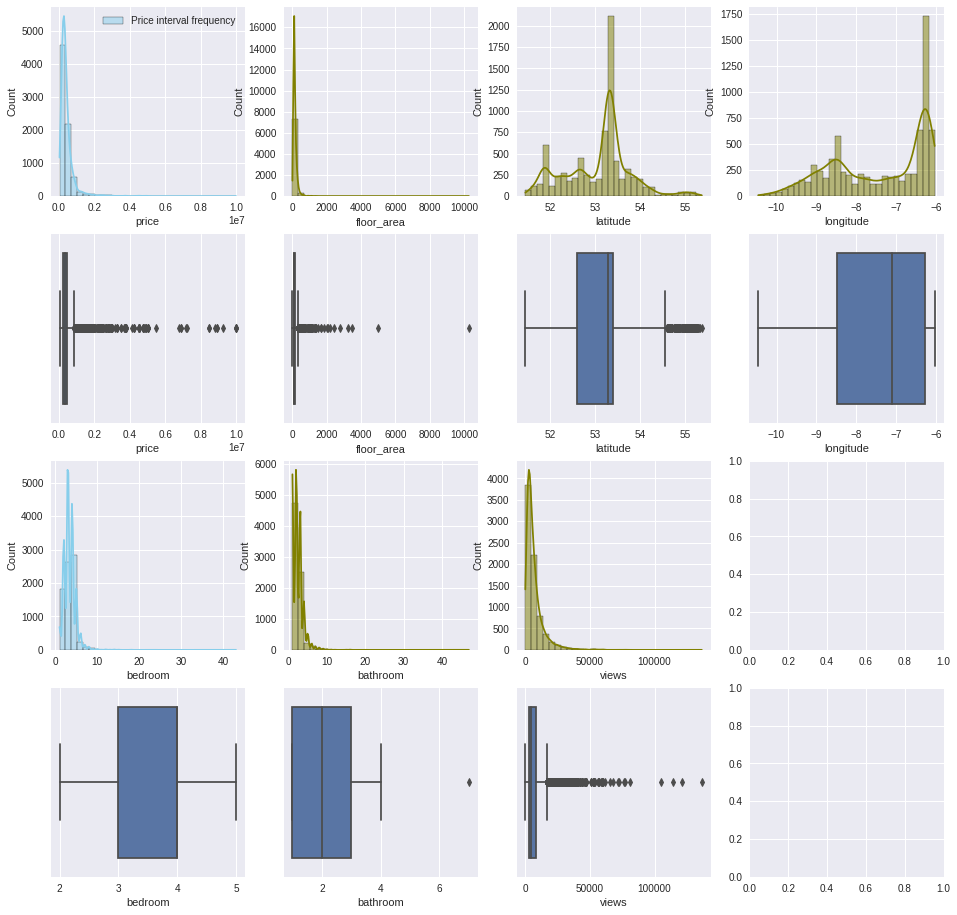

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

sns.histplot(data=sale_data.price, kde=True, bins=30, color="skyblue", ax=axs[0, 0], label='Price interval frequency')  #stat='density', label='Price interval frequency'
sns.boxplot(data=sale_data.price, x=sale_data.price, ax=axs[1, 0])
sns.histplot(data=sale_data.floor_area, kde=True, bins=30, color="olive", ax=axs[0, 1])
sns.boxplot(data=sale_data.floor_area, x=sale_data.floor_area, ax=axs[1, 1])

sns.histplot(data=sale_data.latitude, kde=True, bins=30, color="olive", ax=axs[0, 2])
sns.boxplot(data=sale_data.latitude, x=sale_data.latitude, ax=axs[1, 2])
sns.histplot(data=sale_data.longitude, kde=True, bins=30, color="olive", ax=axs[0, 3])
sns.boxplot(data=sale_data.longitude, x=sale_data.longitude, ax=axs[1, 3])

sns.histplot(data=sale_data.bedroom, kde=True, bins=30, color="skyblue", ax=axs[2, 0])  #stat='density', label='Price interval frequency'
sns.boxplot(data=sale_data.bedroom, x=sale_data.bedroom, ax=axs[3, 0])
sns.histplot(data=sale_data.bathroom, kde=True, bins=30, color="olive", ax=axs[2, 1])
sns.boxplot(data=sale_data.bathroom, x=sale_data.bathroom, ax=axs[3, 1])

sns.histplot(data=sale_data.views, kde=True, bins=30, color="olive", ax=axs[2, 2])
sns.boxplot(data=sale_data.views, x=sale_data.views, ax=axs[3, 2])

axs[0, 0].legend(); 

In [7]:
# Fisher-Pearson coefficient of skewness
ss.skew(sale_data.price) 
# => Asimetria a la derecha

8.052228514856877

In [8]:
from scipy import stats

print('Kursotis:', stats.kurtosis(sale_data.price))
print('Skewness:', stats.skew(sale_data.price))

Kursotis: 96.87977995734863
Skewness: 8.052228514856877


### Categorical Variables

In [9]:
sale_data.type_house.value_counts()

house        6479
apartment    1216
Name: type_house, dtype: int64

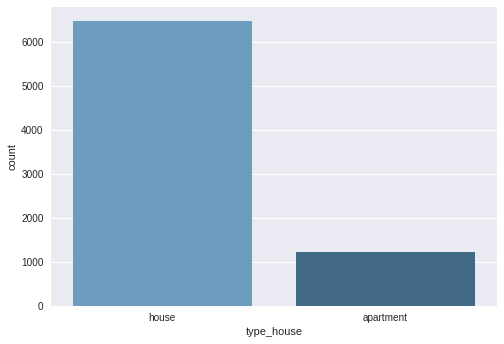

In [10]:
sns.countplot(data=sale_data, x='type_house', palette="Blues_d");

In [11]:
sale_data.drop(columns=['daft_id', 'latitude', 'longitude']).groupby(by='type_house').agg('mean')

,price,floor_area,views,bedroom,bathroom
type_house,,,,,
apartment,320578.248355,76.536184,4813.012336,2.000822,1.615954
house,463748.232598,162.828060,7189.144158,3.686063,2.488038


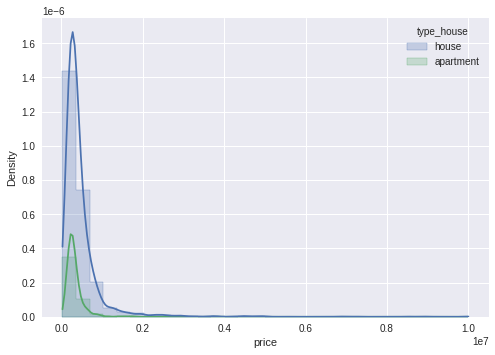

In [12]:
sns.histplot(data=sale_data, x='price', hue='type_house', legend=True, bins=30, 
             kde=True, stat='density', element="step", common_norm=True);

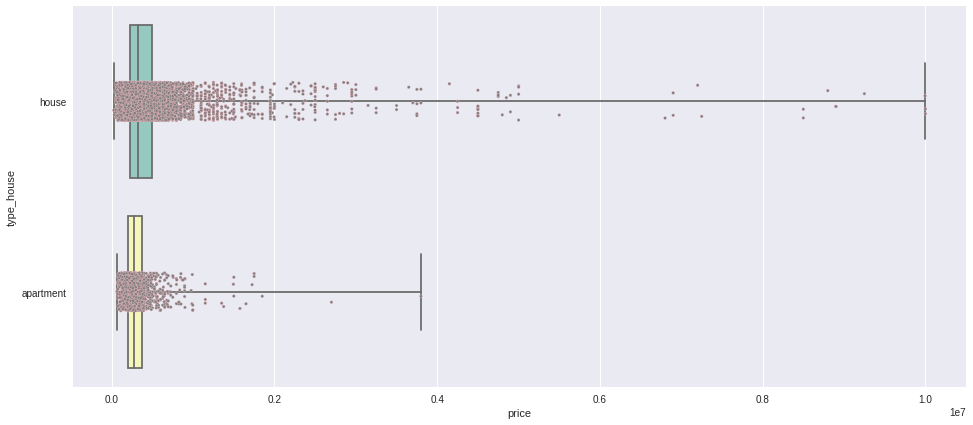

In [13]:
fig, ax = plt.subplots(figsize=(16, 7))

ax = sns.boxplot(data=sale_data, x='price', y='type_house', orient='h', 
                 order=['house', 'apartment'],
                 whis=np.inf, palette="Set3")
ax = sns.stripplot(data=sale_data, x='price', y='type_house' ,orient='h', 
                   order=['house', 'apartment'],
                   color="gray", edgecolor="pink", linewidth=.3,  size=3)

## Statistics

- Measures of Position
- Measures of Dispersion
    - MD Absolutes
    - MD Relatives
    - Teorema de Tchebycheff
- Asymmetry and Kurtosis

In [14]:
sale_data.drop(columns=['daft_id']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,7695.0,441123.840026,559497.409220,25000.000000,220000.000000,315000.000000,475000.000000,1.000000e+07
floor_area,7695.0,149.191813,187.894773,1.000000,83.000000,112.000000,170.000000,1.027900e+04
views,7695.0,6813.656660,7594.513251,0.000000,2526.500000,4567.000000,8257.000000,1.364560e+05
latitude,7695.0,53.073054,0.718554,51.460139,52.607087,53.283705,53.395819,5.536339e+01
longitude,7695.0,-7.432629,1.191594,-10.459878,-8.493948,-7.109124,-6.277835,-6.027847e+00
bedroom,7695.0,3.419753,1.510908,1.000000,3.000000,3.000000,4.000000,4.300000e+01
bathroom,7695.0,2.350227,1.476052,1.000000,1.000000,2.000000,3.000000,4.700000e+01


## What the data is telling us

Este es buen punto para hacer un poco de feature engineering y crear nuevas variables a partir de las coordenadas. De este modo, seremos capaces de estudiar mejor como los datos se distribuyen geograficamente.

-> Feature_Engineering_Geospatial_Data

In [61]:
sale_data_post_geosp = pd.read_csv('data_available/sale_data_geosp_improved.csv', sep=',')
sale_data_post_geosp.shape

(7695, 32)

In [62]:
sale_data_post_geosp.isna().sum()

daft_id                 0
url                     0
name                    0
price                   0
sale_type               0
floor_area              0
entered_renewed         0
views                   0
type_house              0
type                    0
scraping_date           0
latitude                0
longitude               0
bedroom                 0
bathroom                0
country_code            0
country                 0
postcode             1302
state_district        371
county                701
municipality         6405
city                 5651
town                 6559
city_district         380
locality             7690
suburb               5914
road                 2003
house_number         6226
place                1375
code                 1375
admin1               1375
place_coordinates    1375
dtype: int64

### Geospatial Data Distributions and Statistics

In [63]:
sale_data_post_geosp.place.value_counts().head()

Cork city southside    244
Limerick               202
Galway                 199
Dublin 4               167
Dun Laoghaire          161
Name: place, dtype: int64

Vamos a hacer una nueva columna con los mismos datos pero en la que dublin no este diferenciada por postal istricts

In [64]:
print(sale_data_post_geosp.shape)
sale_data_post_geosp['cities'] = sale_data_post_geosp.place.copy()
print(sale_data_post_geosp.shape)

(7695, 32)
(7695, 33)


In [67]:
ix_to_change_dublin = sale_data_post_geosp.cities.dropna()[sale_data_post_geosp.cities.dropna().str.contains('Dublin')].index
ix_to_change_cork = sale_data_post_geosp.cities.dropna()[sale_data_post_geosp.cities.dropna().str.contains('Cork')].index
#ix_to_change

In [68]:
sale_data_post_geosp.cities.iloc[ix_to_change_dublin] = 'Dublin'
sale_data_post_geosp.cities.iloc[ix_to_change_cork] = 'Cork'

In [69]:
freq_cities = sale_data_post_geosp.cities.value_counts()
#freq_cities

In [70]:
freq_cities.values

array([1853,  353,  202,  199,  161,  118,  118,  113,  103,   96,   86,
         85,   80,   79,   72,   67,   67,   67,   66,   61,   61,   59,
         59,   55,   55,   51,   50,   50,   47,   46,   45,   45,   45,
         45,   44,   44,   42,   41,   41,   40,   40,   39,   38,   37,
         37,   37,   35,   35,   35,   34,   33,   33,   33,   32,   31,
         30,   30,   29,   27,   26,   26,   24,   23,   23,   20,   20,
         20,   20,   18,   18,   17,   17,   17,   17,   16,   15,   15,
         15,   15,   14,   14,   13,   13,   13,   13,   13,   12,   11,
         11,   11,   11,   10,    9,    9,    9,    8,    8,    7,    7,
          7,    7,    7,    6,    5,    4,    4,    4,    3,    3,    3,
          3,    3,    3,    2,    2])

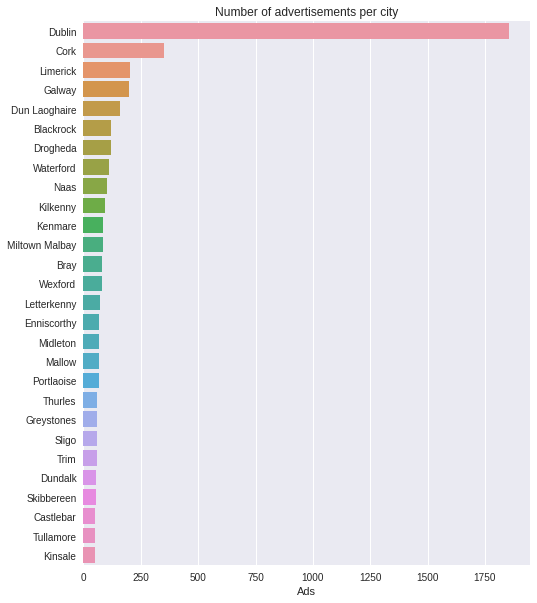

In [75]:
freq_cities = freq_cities[freq_cities >= 50].copy()

fig= plt.figure(figsize=(8,10))
ax = sns.barplot(x=freq_cities, y=freq_cities.index)
ax.set_title('Number of advertisements per city')
ax.set_xlabel('Ads');

In [81]:
freq_cities.index

Index(['Dublin', 'Cork', 'Limerick', 'Galway', 'Dun Laoghaire', 'Blackrock',
       'Drogheda', 'Waterford', 'Naas', 'Kilkenny', 'Kenmare',
       'Miltown Malbay', 'Bray', 'Wexford', 'Letterkenny', 'Enniscorthy',
       'Midleton', 'Mallow', 'Portlaoise', 'Thurles', 'Greystones', 'Sligo',
       'Trim', 'Dundalk', 'Skibbereen', 'Castlebar', 'Tullamore', 'Kinsale'],
      dtype='object')

In [88]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [96]:
mean_price = sale_data_post_geosp.groupby(by='cities', axis=0)['price'].mean().sort_values(ascending=False)[freq_cities[freq_cities >= 100].index]
mean_price

Dublin           589919.86
Cork             366944.48
Limerick         317945.54
Galway           372713.57
Dun Laoghaire   1443631.06
Blackrock        788223.73
Drogheda         298207.63
Waterford        368039.82
Naas             600852.43
Name: price, dtype: float64

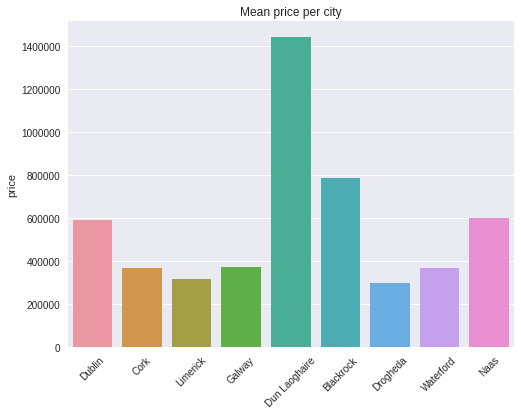

In [135]:
fig= plt.figure(figsize=(8,6))
ax = sns.barplot(x=mean_price.index, y=mean_price)
ax.set_title('Mean price per city')
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(mean_price.index, rotation=45);
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
#ax.set_xlabel('Ads');

### Irelan's Real Estate Market

### Clustering the Data

# Outliers Detection

#### Percentile based method

In [15]:
def pct_method(data, level):
    # Upper and lower limits by percentiles
    upper = np.percentile(data, 100 - level)
    lower = np.percentile(data, level)
    # Returning the upper and lower limits
    return [lower, upper]

#### Interquartile range method

In [16]:
def iqr_method(data):
    # Calculating the IQR
    perc_75 = np.percentile(data, 75)
    perc_25 = np.percentile(data, 25)
    iqr_range = perc_75 - perc_25
    # Obtaining the lower and upper bound
    iqr_upper = perc_75 + 1.5 * iqr_range
    iqr_lower = perc_25 - 1.5 * iqr_range
    # Returning the upper and lower limits
    return [iqr_lower, iqr_upper]

In [17]:
# This approach only works if the data is approximately Gaussian
def std_method(data):
    # Creating three standard deviations away boundaries
    std = np.std(data)
    upper_3std = np.mean(data) + 3 * std
    lower_3std = np.mean(data) - 3 * std
    # Returning the upper and lower limits
    return [lower_3std, upper_3std]

In [18]:
def outlier_bool(df, feature, level=1, continuous=False, log=False):
    
    data = df[feature]
    
    
    
    # Taking logs is specified
    if log is True:
        data = np.log(data + 1)
    # Obtaining the ranges
    pct_range = pct_method(data, level)
    iqr_range = iqr_method(data)
    std_range = std_method(data)
    
    if continuous is False:
        # Setting the lower limit fixed for discrete variables
        low_limit = np.min(data)
        high_limit = np.max([pct_range[1],
                             iqr_range[1],
                             std_range[1]])
        
    elif continuous is True:
        if feature is 'floor_area':
            #print('si')
            low_limit = pct_range[0]
        else:
            #print('no')
            low_limit = np.min([pct_range[0],
                                iqr_range[0],
                                std_range[0]])
        high_limit = np.max([pct_range[1],
                             iqr_range[1],
                             std_range[1]])
        
    print(f'Limits: {[low_limit, high_limit]}')
# Restrict the data with the minimum and maximum
    outlier = data.between(low_limit, high_limit)
    print(f'No outliers: {outlier.sum()}')
    print(f'Outliers: {(outlier==False).sum()}\n')
    
    
# Return boolean
    return outlier

In [19]:
def drop_outliers(df, feature, level=1, continuous=False, log=False, inplace=False):
    print(f'Range before: {[df[feature].min(), df[feature].max()]}\n')
    outlier_boolean = outlier_bool(df=df, feature=feature, level=1, continuous=continuous, log=False)
    rows_before = df.shape[0]
    df = df[outlier_boolean]
    rows_after = df.shape[0]
    print(f'Range after: {[df[feature].min(), df[feature].max()]}')
    print(f'Outliers dropped: {rows_before - rows_after}')
    return df

#### Dropping `price` Outliers

In [20]:
sd_out_price = drop_outliers(sale_data, 'price', continuous=True)
sd_out_price.shape

Range before: [25000.0, 10000000.0]

Limits: [-1237259.320268431, 2650000.0]
No outliers: 7621
Outliers: 74

Range after: [25000.0, 2650000.0]
Outliers dropped: 74


(7621, 15)

In [21]:
pct_range = pct_method(sale_data.price, level=1)
iqr_range = iqr_method(sale_data.price)
std_range = std_method(sale_data.price)

print(pct_range)
print(iqr_range)
print(std_range)

[80000.0, 2650000.0]
[-162500.0, 857500.0]
[-1237259.320268431, 2119507.0003204127]


In [22]:
sale_data.price.sort_values().head() # Los quito?

1054    25000.0
7306    32000.0
6953    40000.0
7671    40000.0
7066    45000.0
Name: price, dtype: float64

In [23]:
sd_out_price.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7694],
           dtype='int64', length=7621)

#### Dropping `floor_area` Outliers

In [24]:
sd_out_farea = drop_outliers(sale_data, 'floor_area', continuous=True)
sd_out_farea.shape

Range before: [1, 10279]

Limits: [38.0, 712.8395035046221]
No outliers: 7575
Outliers: 120

Range after: [38, 710]
Outliers dropped: 120


(7575, 15)

Aqui no funciona muy bien porque permite valores pequegnos sin sentido para una casa. En este caso usaremos el limite inferior del percentile method, que es el mas restrictivo. 

In [25]:
pct_range = pct_method(sale_data.floor_area, level=1)
iqr_range = iqr_method(sale_data.floor_area)
std_range = std_method(sale_data.floor_area)

print(pct_range)
print(iqr_range)
print(std_range)

[38.0, 624.5399999999954]
[-47.5, 300.5]
[-414.45587777362795, 712.8395035046221]


In [26]:
sale_data.floor_area.sort_values().head()

6243    1
4072    1
7229    1
7236    1
7096    1
Name: floor_area, dtype: int64

In [27]:
sd_out_farea.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7694],
           dtype='int64', length=7575)

#### Dropping `views` Outliers

In [28]:
sd_out_views = drop_outliers(sale_data, 'views', continuous=True)
sd_out_views.shape

Range before: [0.0, 136456.0]

Limits: [-15968.402634048929, 36608.39999999998]
No outliers: 7618
Outliers: 77

Range after: [0.0, 36606.0]
Outliers dropped: 77


(7618, 15)

In [29]:
pct_range = pct_method(sale_data.views, level=1)
iqr_range = iqr_method(sale_data.views)
std_range = std_method(sale_data.views)

print(pct_range)    ####
print(iqr_range)
print(std_range)

[413.88, 36608.39999999998]
[-6069.25, 16852.75]
[-15968.402634048929, 29595.71595438681]


In [30]:
sale_data['views'].sort_values().head()

1652    0.0
5160    0.0
7048    0.0
5984    0.0
3857    0.0
Name: views, dtype: float64

In [31]:
sd_out_views.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693],
           dtype='int64', length=7618)

#### Dropping `bedroom` Outliers

In [32]:
sd_out_bedroom = drop_outliers(sale_data, 'bedroom', continuous=True)
sd_out_bedroom.shape

Range before: [1, 43]

Limits: [-1.1126768456067389, 8.0]
No outliers: 7644
Outliers: 51

Range after: [1, 8]
Outliers dropped: 51


(7644, 15)

In [33]:
pct_range = pct_method(sale_data.bedroom, level=1)
iqr_range = iqr_method(sale_data.bedroom)
std_range = std_method(sale_data.bedroom)

print(pct_range)    ####
print(iqr_range)
print(std_range)

[1.0, 8.0]
[1.5, 5.5]
[-1.1126768456067389, 7.952183018446245]


In [34]:
sale_data['bedroom'].sort_values().head()

1212    1
930     1
2444    1
2446    1
370     1
Name: bedroom, dtype: int64

In [35]:
sd_out_bedroom.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7693, 7694],
           dtype='int64', length=7644)

#### Dropping `bathroom` Outliers

In [36]:
sd_out_bathroom = drop_outliers(sale_data, 'bathroom', continuous=True)
sd_out_bathroom.shape

Range before: [1, 47]

Limits: [-2.0776398208827422, 7.0]
No outliers: 7624
Outliers: 71

Range after: [1, 7]
Outliers dropped: 71


(7624, 15)

In [37]:
pct_range = pct_method(sale_data.bathroom, level=1)
iqr_range = iqr_method(sale_data.bathroom)
std_range = std_method(sale_data.bathroom)

print(pct_range)    ####
print(iqr_range)
print(std_range)

[1.0, 7.0]
[-2.0, 6.0]
[-2.0776398208827422, 6.77809466168846]


In [38]:
sale_data['bathroom'].sort_values().head()

1773    1
5054    1
2131    1
5047    1
2140    1
Name: bathroom, dtype: int64

Con todo lo de arriba puedo hacer un for loop

In [39]:
sd_out_bathroom.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7693, 7694],
           dtype='int64', length=7624)

In [40]:
sale_data.shape

(7695, 15)

In [82]:
index_list = [sd_out_price.index, sd_out_farea.index, sd_out_views.index, sd_out_bedroom.index, sd_out_bathroom.index]

def common_ix(index_list):
    data_ix = []
    for i, elem in enumerate(index_list):
        if i == 0:
            initial_ix = elem
            for ix in initial_ix:
                if ix in index_list[i+1]:
                    data_ix.append(ix)
            print(len(data_ix))
    
        elif i < 4:
            for ix in data_ix:
                if ix not in index_list[i+1]:
                    data_ix.remove(ix)
            print(len(data_ix))
    return data_ix

In [76]:
data_ix = common_ix(index_list)

7514
7459
7419
7387


In [79]:
print(sale_data.shape)
sale_data_out = sale_data.iloc[data_ix]
print(sale_data_out.shape)

(7695, 15)
(7387, 15)


In [80]:
def drop_all_outliers(df, index_list):
    data_ix = common_ix(index_list)
    print(df.shape)
    sale_data_out = df.iloc[data_ix]
    print(sale_data_out.shape)
    return sale_data_out

In [81]:
sale_data_out = drop_all_outliers(df=sale_data, index_list=index_list)

7514
7459
7419
7387
(7695, 15)
(7387, 15)


In [83]:
sale_data_out.drop(columns=['daft_id']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,7387.0,393253.018681,305115.906121,25000.000000,220000.000000,305000.000000,460000.000000,2.650000e+06
floor_area,7387.0,135.206173,79.025488,38.000000,83.000000,111.000000,164.000000,7.100000e+02
views,7387.0,6213.877352,5592.815177,0.000000,2476.000000,4440.000000,7967.000000,3.786100e+04
latitude,7387.0,53.078945,0.715929,51.460139,52.627882,53.284678,53.398847,5.531682e+01
longitude,7387.0,-7.426580,1.184337,-10.459878,-8.491297,-7.108117,-6.279381,-6.027847e+00
bedroom,7387.0,3.324218,1.173801,1.000000,3.000000,3.000000,4.000000,8.000000e+00
bathroom,7387.0,2.249086,1.142541,1.000000,1.000000,2.000000,3.000000,7.000000e+00


# Relationships

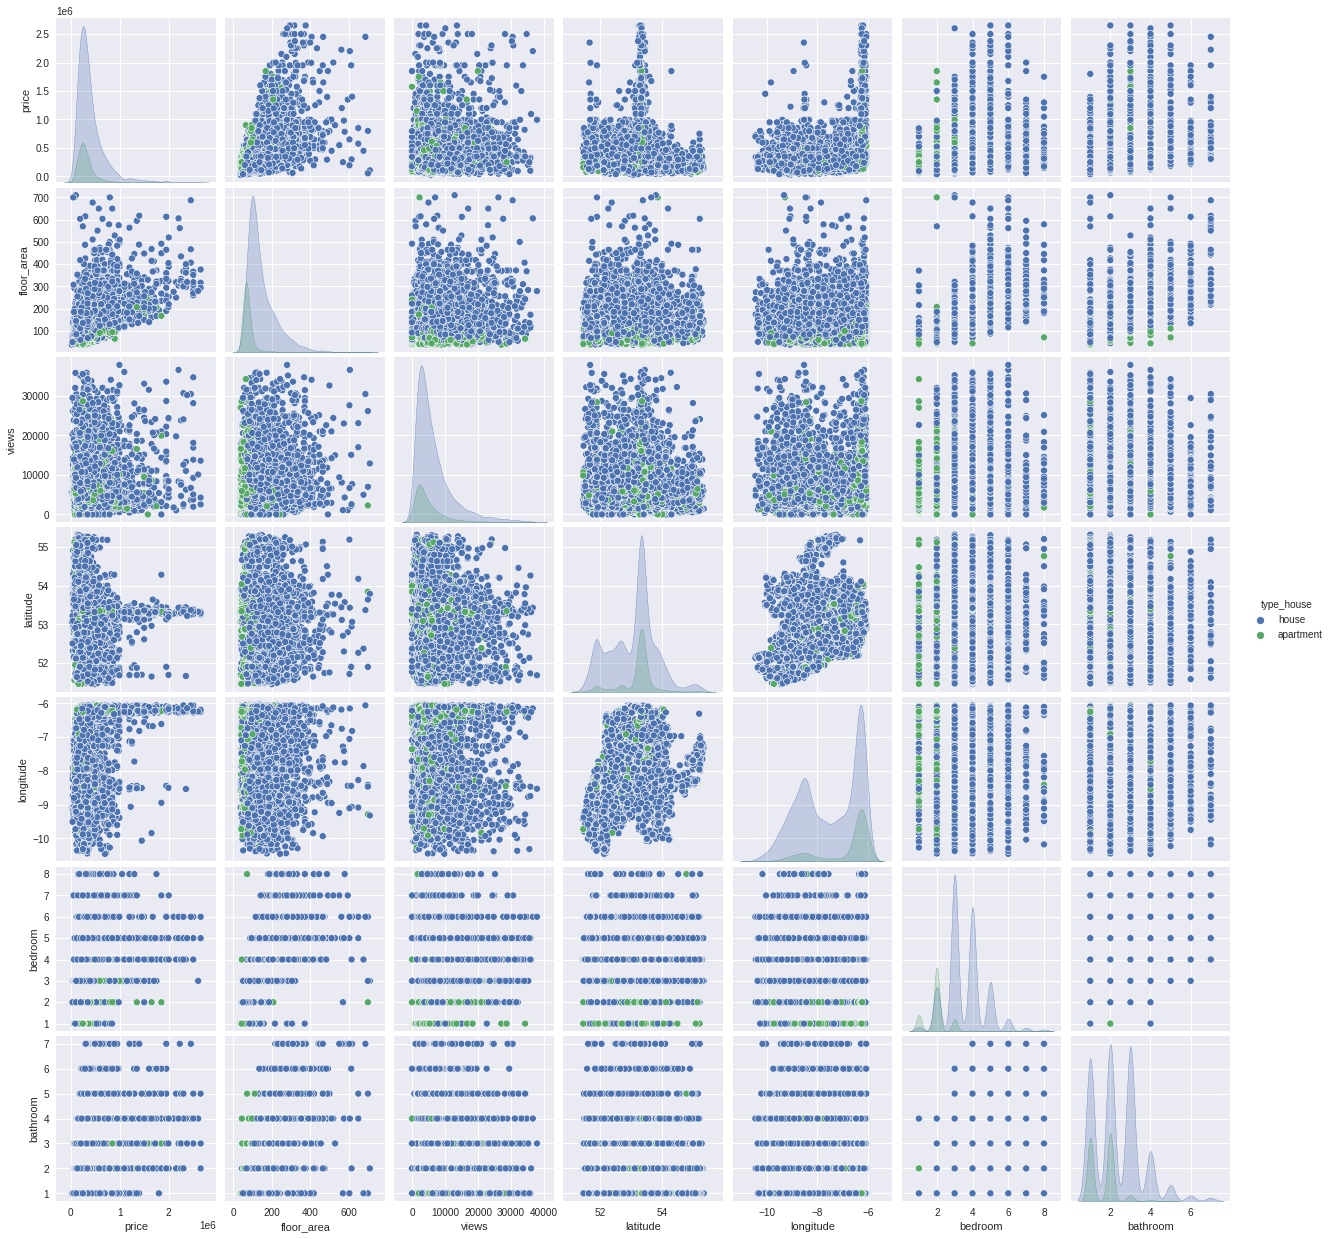

In [87]:
sns.pairplot(sale_data_out.drop(columns=['daft_id']), hue='type_house');

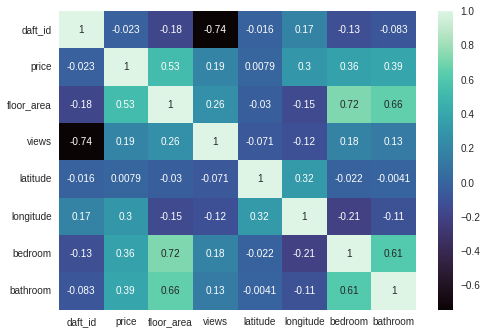

In [88]:
sns.heatmap(sale_data_out.corr(), annot=True, cmap='mako');  

https://medium.com/towards-data-science/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [84]:
sale_data_out.to_csv('data_available/sale_data_post_out.csv', sep=',', index=False)